<a href="https://colab.research.google.com/github/harshithp2004/EDA_Heart_disease_prediction/blob/main/Dsproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("/content/heart_disease.xlsx")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1.0,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1.0,0.0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0.0,1.0,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0.0,1.0,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1.0,1.0,106.0,0,1.9,1,3,2,0
5,58,0,0,100.0,248.0,0.0,0.0,122.0,0,1.0,1,0,2,1
6,58,1,0,114.0,318.0,0.0,2.0,140.0,0,4.4,0,3,1,0
7,55,1,0,160.0,289.0,0.0,0.0,145.0,1,0.8,1,1,3,0
8,46,1,0,120.0,249.0,0.0,0.0,144.0,0,0.8,2,0,3,0
9,54,1,0,122.0,286.0,0.0,0.0,116.0,1,3.2,1,2,2,0


In [ ]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps    44
chol        18
fbs          2
restecg      4
thalach     28
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  981 non-null    float64
 4   chol      1007 non-null   float64
 5   fbs       1023 non-null   float64
 6   restecg   1021 non-null   float64
 7   thalach   997 non-null    float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 112.2 KB


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,981.000000,1007.000000,1023.000000,1021.000000,997.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.308869,245.792453,0.149560,0.529873,149.075226,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.373902,51.797603,0.356814,0.527981,23.011726,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df=df.rename(columns={"cp":"Chest pain","trestbps":"Rest BP","chol":"Cholesterol", "fbs":"Fasting BS","Restecg":"Resting ecg","thalach":"Max_heart_rate"})

In [ ]:
df['Rest BP']=df['Rest BP'].fillna(df['Rest BP'].mode()[0])
df.head(10)

,age,sex,Chest pain,Rest BP,Cholesterol,Fasting BS,restecg,Max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1.0,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1.0,0.0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0.0,1.0,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0.0,1.0,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1.0,1.0,106.0,0,1.9,1,3,2,0
5,58,0,0,100.0,248.0,0.0,0.0,122.0,0,1.0,1,0,2,1
6,58,1,0,114.0,318.0,0.0,2.0,140.0,0,4.4,0,3,1,0
7,55,1,0,160.0,289.0,0.0,0.0,145.0,1,0.8,1,1,3,0
8,46,1,0,120.0,249.0,0.0,0.0,144.0,0,0.8,2,0,3,0
9,54,1,0,122.0,286.0,0.0,0.0,116.0,1,3.2,1,2,2,0


In [ ]:
df.isnull().sum()

age                0
sex                0
Chest pain         0
Rest BP            0
Cholesterol       18
Fasting BS         2
restecg            4
Max_heart_rate    28
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
target             0
dtype: int64

In [ ]:
Cholesterol = df['Cholesterol'].mean()
df['Cholesterol'].fillna(Cholesterol, inplace=True)
# Fill null values in 'Fasting Blood Sugar' column with the mode
Fasting_BS = df['Fasting BS'].mode()[0]
df['Fasting BS'].fillna(Fasting_BS, inplace=True)

# Fill null values in 'Resting Electrocardiographic Results' column with the mrestecg
restecg= df['restecg'].mode()[0]
df['restecg'].fillna(restecg, inplace=True)

# Fill null values in 'Maximum Heart Rate Achieved' column with the mean
Max_heart_rate= df['Max_heart_rate'].mean()
df['Max_heart_rate'].fillna(Max_heart_rate, inplace=True)

In [ ]:
df.isnull().sum()

age               0
sex               0
Chest pain        0
Rest BP           0
Cholesterol       0
Fasting BS        0
restecg           0
Max_heart_rate    0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
target            0
dtype: int64

In [ ]:
df.drop('Fasting BS', axis=1, inplace=True)

In [ ]:
df.head(10)

,age,sex,Chest pain,Rest BP,Cholesterol,restecg,Max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,1.0,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,0.0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,1.0,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,1.0,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1.0,106.0,0,1.9,1,3,2,0
5,58,0,0,100.0,248.0,0.0,122.0,0,1.0,1,0,2,1
6,58,1,0,114.0,318.0,2.0,140.0,0,4.4,0,3,1,0
7,55,1,0,160.0,289.0,0.0,145.0,1,0.8,1,1,3,0
8,46,1,0,120.0,249.0,0.0,144.0,0,0.8,2,0,3,0
9,54,1,0,122.0,286.0,0.0,116.0,1,3.2,1,2,2,0


In [ ]:
df.columns

Index(['age', 'sex', 'Chest pain', 'Rest BP', 'Cholesterol', 'restecg',
       'Max_heart_rate', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.duplicated().sum()

636

In [ ]:
df.min()

age                29.0
sex                 0.0
Chest pain          0.0
Rest BP            94.0
Cholesterol       126.0
restecg             0.0
Max_heart_rate     71.0
exang               0.0
oldpeak             0.0
slope               0.0
ca                  0.0
thal                0.0
target              0.0
dtype: float64

In [ ]:
df.max()

age                77.0
sex                 1.0
Chest pain          3.0
Rest BP           200.0
Cholesterol       564.0
restecg             2.0
Max_heart_rate    202.0
exang               1.0
oldpeak             6.2
slope               2.0
ca                  4.0
thal                3.0
target              1.0
dtype: float64

In [ ]:
df.corr()

,age,sex,Chest pain,Rest BP,Cholesterol,restecg,Max_heart_rate,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.255707,0.218660,-0.130250,-0.384708,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.077561,-0.199633,-0.056702,-0.044811,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
Chest pain,-0.071966,-0.041119,1.000000,0.037416,-0.077469,0.042000,0.307966,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
Rest BP,0.255707,-0.077561,0.037416,1.000000,0.123437,-0.109267,-0.019860,0.047444,0.156080,-0.093302,0.096641,0.046846,-0.113651
Cholesterol,0.218660,-0.199633,-0.077469,0.123437,1.000000,-0.145411,-0.015083,0.062859,0.062907,-0.012947,0.071053,0.099739,-0.095150
restecg,-0.130250,-0.056702,0.042000,-0.109267,-0.145411,1.000000,0.043612,-0.068254,-0.047673,0.086791,-0.080797,-0.025421,0.138100
Max_heart_rate,-0.384708,-0.044811,0.307966,-0.019860,-0.015083,0.043612,1.000000,-0.376650,-0.336313,0.388561,-0.196273,-0.092927,0.417903
exang,0.088163,0.139157,-0.401513,0.047444,0.062859,-0.068254,-0.376650,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.156080,0.062907,-0.047673,-0.336313,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441
slope,-0.169105,-0.026666,0.131633,-0.093302,-0.012947,0.086791,0.388561,-0.267335,-0.575189,1.000000,-0.073440,-0.094090,0.345512


In [ ]:
df_updated=df.drop_duplicates()

In [ ]:
df_updated.duplicated().sum()

0

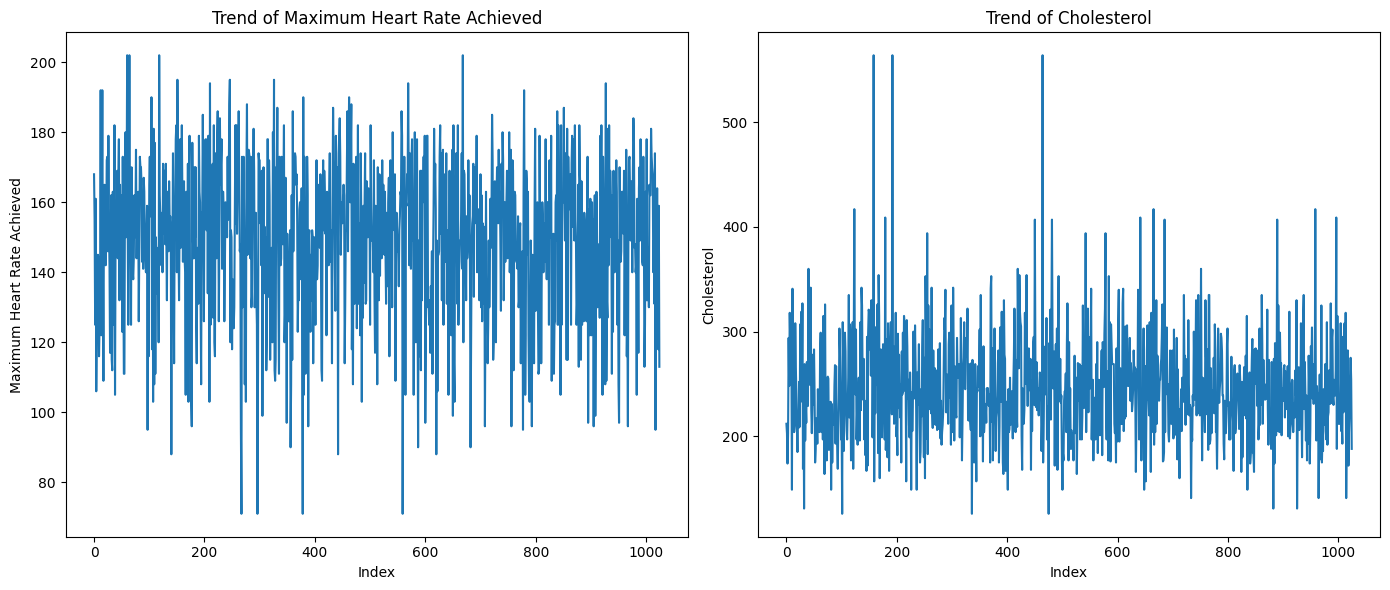

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Univariate Analysis - Line Plot for Maximum Heart Rate Achieved
sns.lineplot(ax=axes[0], x=df.index, y='Max_heart_rate', data=df)
axes[0].set_title('Trend of Maximum Heart Rate Achieved')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Maximum Heart Rate Achieved')

# Univariate Analysis - Line Plot for Cholesterol
sns.lineplot(ax=axes[1], x=df.index, y='Cholesterol', data=df)
axes[1].set_title('Trend of Cholesterol')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Cholesterol')

# Adjust layout
plt.tight_layout()

plt.show()

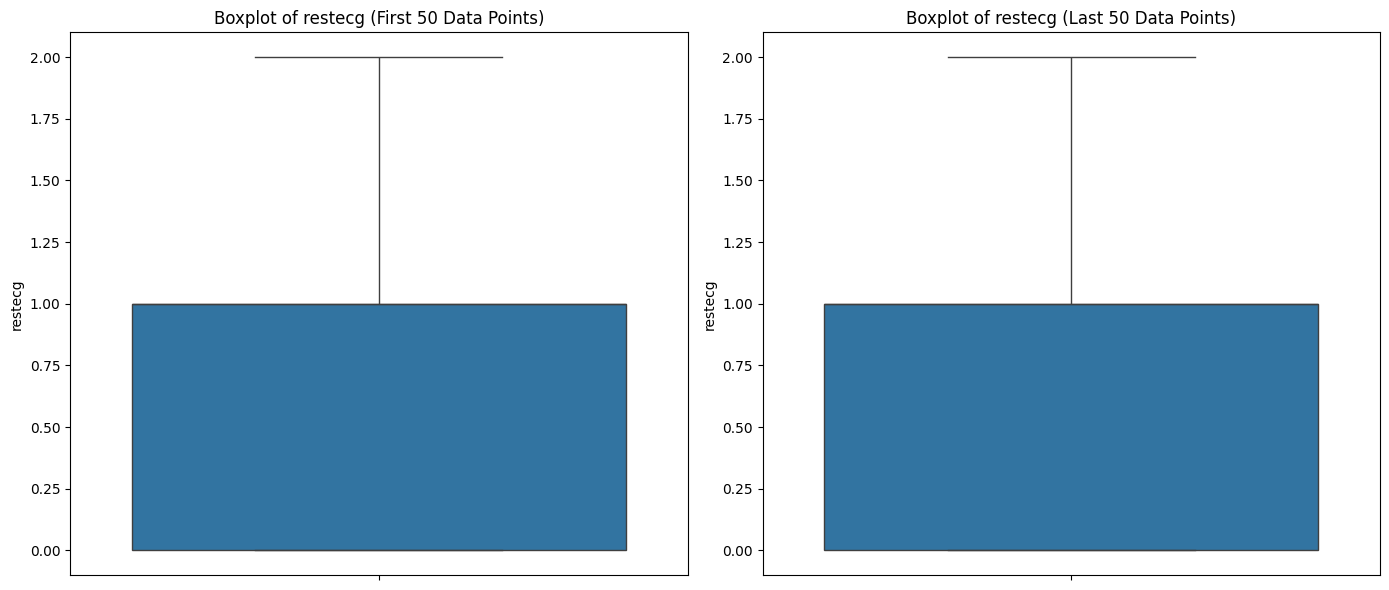

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the 'restecg' column for analysis
restecg_column = 'restecg'

# Select only the first 50 and last 50 data points from the DataFrame
first_50 = df.head(50)
last_50 = df.tail(50)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot box plots for the 'restecg' column
sns.boxplot(ax=axes[0], y=restecg_column, data=first_50)
axes[0].set_title(f'Boxplot of {restecg_column} (First 50 Data Points)')
axes[0].set_ylabel(restecg_column)

sns.boxplot(ax=axes[1], y=restecg_column, data=last_50)
axes[1].set_title(f'Boxplot of {restecg_column} (Last 50 Data Points)')
axes[1].set_ylabel(restecg_column)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

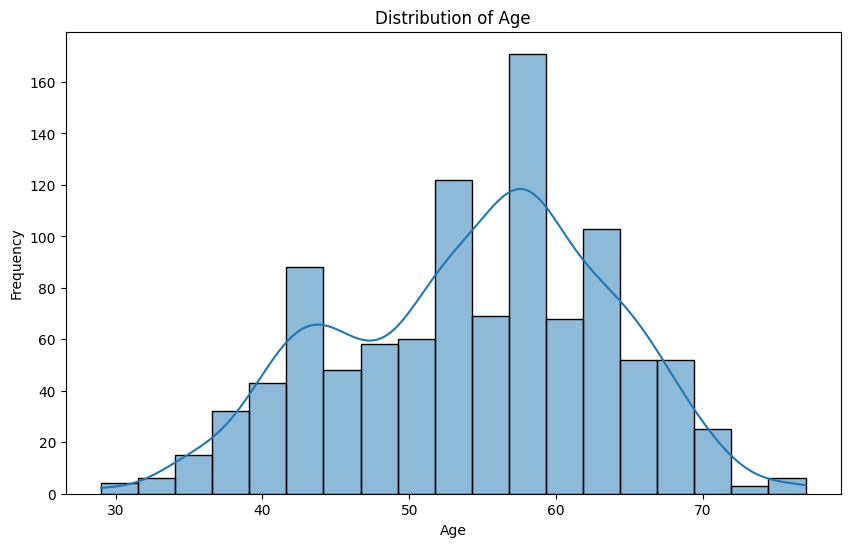

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the 'Age' column for analysis
age_column = 'age'

# Plot the histogram for the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(df[age_column], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


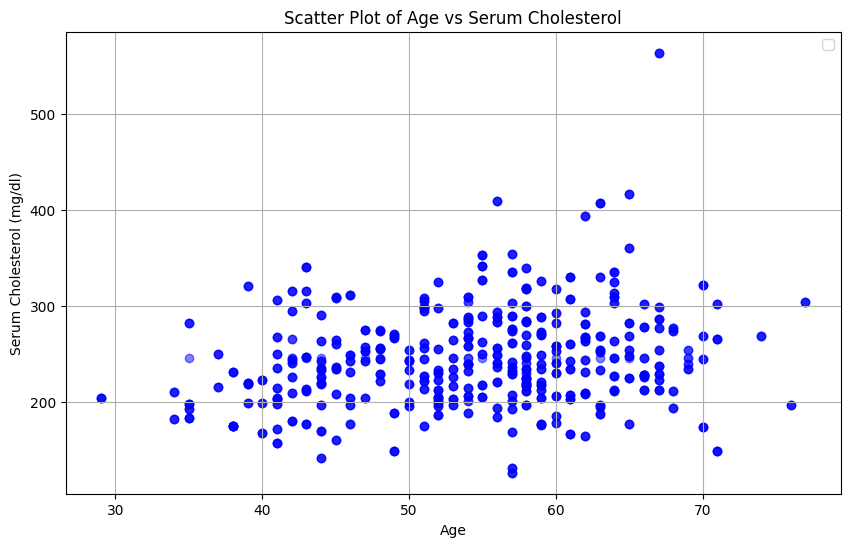

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['Cholesterol'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs Serum Cholesterol')
plt.xlabel('Age')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.legend()
plt.grid(True)

plt.show()


<ipython-input-28-8c5e97c792cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='thal', data=df, palette='muted', inner='quartile', label='Maximum Heart Rate Achieved')


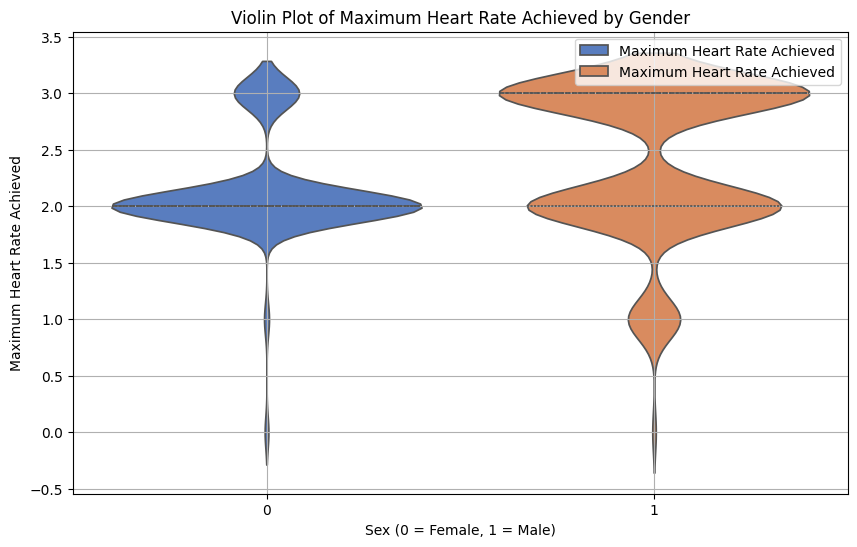

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='thal', data=df, palette='muted', inner='quartile', label='Maximum Heart Rate Achieved')
plt.title('Violin Plot of Maximum Heart Rate Achieved by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend()
plt.grid(True)
plt.show()


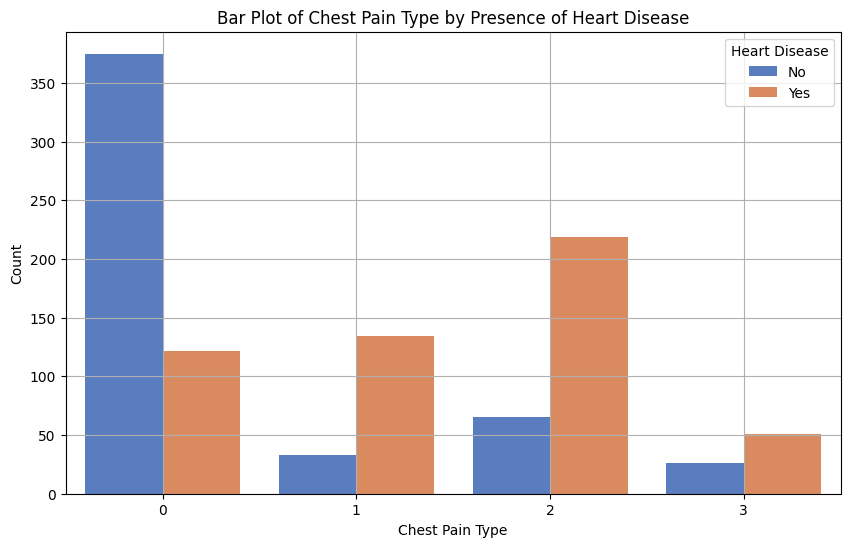

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Chest pain', hue='target', data=df, palette='muted')
plt.title('Bar Plot of Chest Pain Type by Presence of Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


<ipython-input-30-96c4124df1aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df, palette='muted')


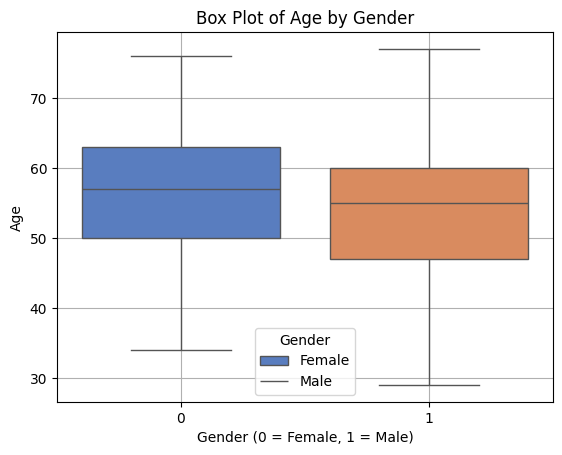

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
sns.boxplot(x='sex', y='age', data=df, palette='muted')
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Age')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.grid(True)
plt.show()


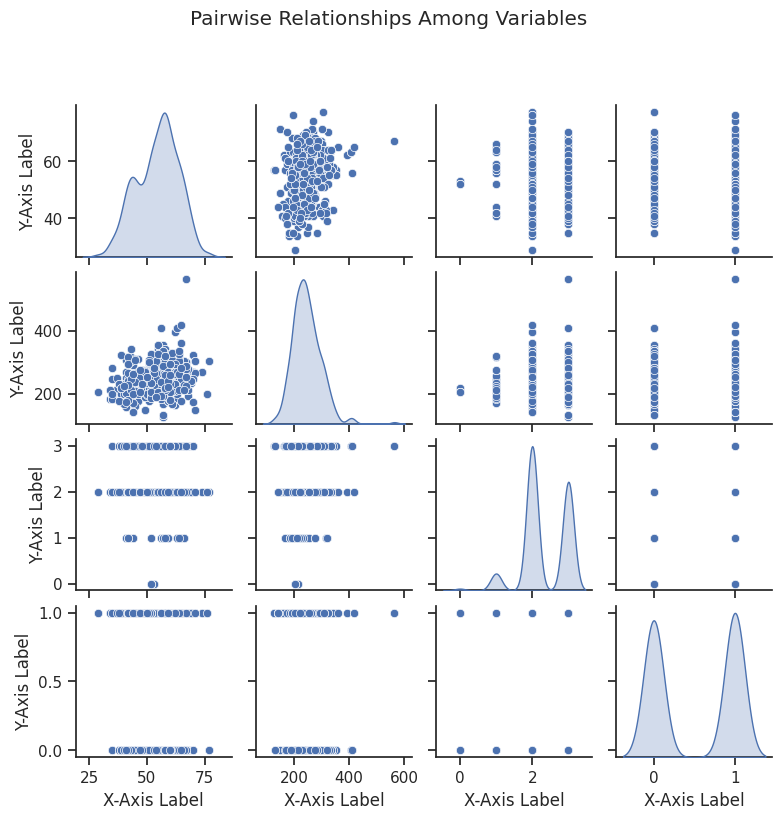

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected 4 columns from the heart disease prediction dataset
selected_columns = ['age', 'Cholesterol', 'thal', 'target']

# Set the seaborn style
sns.set(style='ticks')

# Create the pairplot
pairplot = sns.pairplot(df[selected_columns], diag_kind='kde', height=2)

# Set the title for the pairplot
pairplot.fig.suptitle('Pairwise Relationships Among Variables', y=1.02)

# Set the x-axis and y-axis labels
pairplot.set(xlabel='X-Axis Label', ylabel='Y-Axis Label')

# Adjust the layout to ensure the title is properly positioned
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


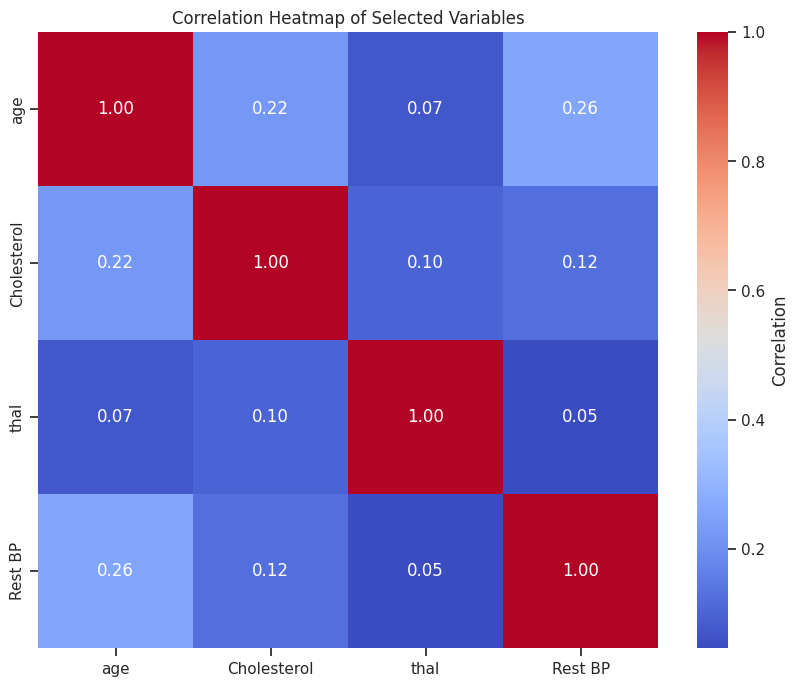

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns for multivariate analysis
selected_columns = ['age', 'Cholesterol', 'thal', 'Rest BP']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a colorbar as a legend
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation')

# Set the title
plt.title('Correlation Heatmap of Selected Variables')

# Show the plot
plt.show()
